# Statistics Introduction Applied to Data Science
## Lab : Six
## Exploratory Data Analysis - Part One

### We import necessary libraries.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Standard python graphics library.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# For the boxplot
!pip install seaborn

We load the operations dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_operations = pd.read_csv('/content/drive/MyDrive/Data/Operations.csv')

In [ ]:
df_operations.head()

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
0,10000,Person,Cash,120000,150000,240,Canada,America
1,10001,Company,Cash,521400,651750,1043,Japan,Asia
2,10002,Company,Credit Card,451000,563750,902,Mexico,America
3,10003,Company,Transfer,565000,706250,1130,Spain,Europe
4,10004,Person,Transfer,512300,640375,1024,Argentina,America


## Describe() method
By default it only shows quantitative variables.

In [ ]:
df_operations.describe()

,Customer,Purchases,Sales,Refunds
count,19.000000,19.000000,19.000000,19.000000
mean,10009.000000,450589.210526,563252.210526,819.210526
std,5.627314,167280.787361,209101.355900,439.467554
min,10000.000000,83000.000000,103750.000000,0.000000
25%,10004.500000,388850.000000,486062.500000,592.000000
50%,10009.000000,454100.000000,567925.000000,910.000000
75%,10013.500000,531200.000000,664000.000000,1062.500000
max,10018.000000,741000.000000,926250.000000,1482.000000


If we want to show only qualitative variables we use the include parameter.

In [ ]:
df_operations.describe(include = [np.object])

,Customer Type,Payment Type,Country,Continent
count,19,19,19,19
unique,2,3,8,3
top,Company,Cash,EEUU,America
freq,10,8,6,14


If I want to see both numeric and categorical variables, include = 'all'.

In [ ]:
df_operations.describe(include = 'all')

,Customer,Customer Type,Payment Type,Purchases,Sales,Refunds,Country,Continent
count,19.000000,19,19,19.000000,19.000000,19.000000,19,19
unique,NaN,2,3,NaN,NaN,NaN,8,3
top,NaN,Company,Cash,NaN,NaN,NaN,EEUU,America
freq,NaN,10,8,NaN,NaN,NaN,6,14
mean,10009.000000,NaN,NaN,450589.210526,563252.210526,819.210526,NaN,NaN
std,5.627314,NaN,NaN,167280.787361,209101.355900,439.467554,NaN,NaN
min,10000.000000,NaN,NaN,83000.000000,103750.000000,0.000000,NaN,NaN
25%,10004.500000,NaN,NaN,388850.000000,486062.500000,592.000000,NaN,NaN
50%,10009.000000,NaN,NaN,454100.000000,567925.000000,910.000000,NaN,NaN
75%,10013.500000,NaN,NaN,531200.000000,664000.000000,1062.500000,NaN,NaN


## Value_counts() method
We can summarize categorical variables.

In [ ]:
df_cus_type_counts = df_operations["Customer Type"].value_counts()
df_cus_type_counts = df_cus_type_counts.to_frame()
df_cus_type_counts

,Customer Type
Company,10
Person,9


To improve readability.

In [ ]:
df_cus_type_counts.rename(columns={'Customer Type':'Count'}, inplace = True)
df_cus_type_counts.index.name = 'Customer Type'
df_cus_type_counts

,Count
Customer Type,
Company,10
Person,9


## Groupby() method

In [ ]:
df_test = df_operations[['Customer Type','Payment Type','Sales']]
df_test.groupby(['Customer Type','Payment Type'], as_index = False).mean()

,Customer Type,Payment Type,Sales
0,Company,Cash,530185.000000
1,Company,Credit Card,711425.666667
2,Company,Transfer,503756.000000
3,Person,Cash,547179.000000
4,Person,Credit Card,508875.000000
5,Person,Transfer,562447.750000


## Pivot() method
To improve the readability of grouped data.

In [ ]:
df_grp = df_test.groupby(['Customer Type','Payment Type'], as_index = False).mean()
df_grp.pivot(index = 'Customer Type', columns = 'Payment Type')

Sales                          
Payment Type       Cash    Credit Card   Transfer
Customer Type                                    
Company        530185.0  711425.666667  503756.00
Person         547179.0  508875.000000  562447.75

## Heatmap
Notice that the heatmap is built from the pivot of the grouped data.

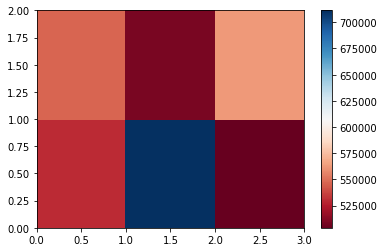

In [ ]:
df_pivot = df_grp.pivot(index = 'Customer Type', columns = 'Payment Type')
plt.pcolor(df_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

We customize the Heatmap for a better presentation.

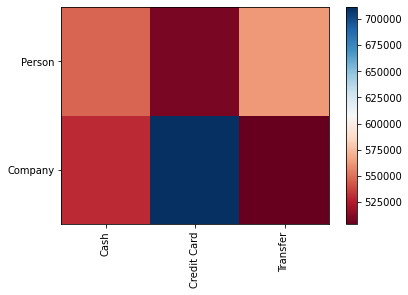

In [ ]:
fig, ax = plt.subplots()
im = ax.pcolor(df_pivot, cmap='RdBu')

#Label names
row_labels = df_pivot.columns.levels[1]
col_labels = df_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_pivot.shape[0]) + 0.5, minor=False)

#Insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#Rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

## Box Plots
Using the standard library.

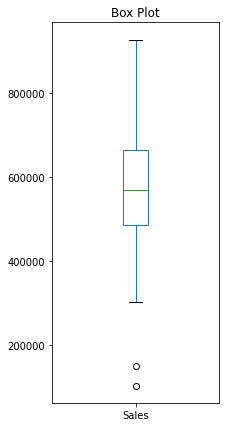

In [ ]:
#We only take the variable sales.
df_oper_sales = df_operations.loc[:,'Sales']

df_oper_sales.plot(kind='box', figsize=(3,7))
plt.title('Box Plot')
plt.show()

Using the seaborn library. A box plot of sales by continent.

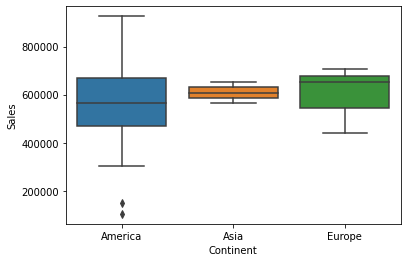

In [ ]:
sns.boxplot(x="Continent", y="Sales", data=df_operations)

### Practice One
Use the value_counts() method to summarize the "Payment Type" categorical variable.

In [ ]:
# Type your code here
df_pay_type_counts = df_operations["Payment Type"].value_counts()
df_pay_type_counts = df_pay_type_counts.to_frame()
df_pay_type_counts


,Payment Type
Cash,8
Transfer,6
Credit Card,5


### Practice Two
Build a Heatmap to see how "Sales" are related to "Customer Type" and "Country".

In [ ]:
# Type your code here
df_test3 = df_operations[["Country", "Customer Type","Sales"]]
df_test3.head()

,Country,Customer Type,Sales
0,Canada,Person,150000
1,Japan,Company,651750
2,Mexico,Company,563750
3,Spain,Company,706250
4,Argentina,Person,640375


In [ ]:
df_grp2 = df_test3.groupby(["Country", "Customer Type"],as_index = False).mean()

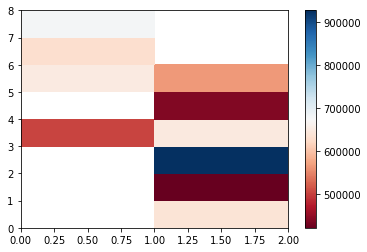

In [ ]:
df_pivot2 = df_grp2.pivot(index = 'Country', columns = 'Customer Type')

plt.pcolor(df_pivot2, cmap = 'RdBu')
plt.colorbar()
plt.show()